# MPS using G2S

The documentation of G2S is on https://github.com/GAIA-UNIL/G2S

The GitHub of G2S is on https://gaia-unil.github.io//G2S/briefOverview.html
    

# Note: Before import the packages and run the codes, you need to run the G2S server. Simply run 'g2s server' in a terminal within the same environment to launch the server

In [1]:
#This code requires the G2S server to be running

import numpy as np
from PIL import Image
import requests
from io import BytesIO
from g2s import g2s
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import os
import pandas as pd


# Data and result paths

In [1]:
# Path of training image
data_dir = '3_5_0_MPS_Training_images/'
TI_name='Uncond_Point_bar_TI_QS.txt'

# Path of saving the simulation results
saved_sim_dir='Saved_sim_dir/Quick_sampling/'


# Simulation setup

In [2]:
nreal=100 # Number of realizations

# Set the target shape of output realizations
target_shape=(64,64)

# Setting the Parameters in DS for different combinations
nneighbor_list=[5, 10, 15, 20] #[10, 20, 30, 40, 50]
k_list=[1, 3, 5]

# Load the training image

In [9]:
TI=np.loadtxt(data_dir+TI_name, delimiter=',', dtype=int)

In [10]:
TI.shape

(200, 200)

In [11]:
TI

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# TI

Text(0.5, 1.0, 'TI')

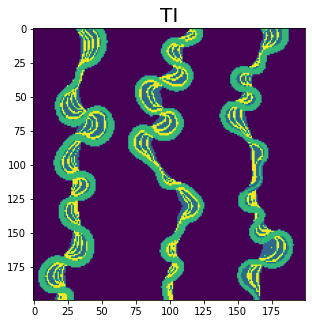

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(TI)
plt.title('TI',fontsize=20)

# Unconditional simulation with different n and k 

In [6]:
run_time=[] # save the run time for each job
parameter_name=[] # Combination of different parameters

process_index=0
total_n_jobs=len(nneighbor_list)*len(k_list)

for nneighbor in nneighbor_list:
    for k in k_list:
        
        start_time = time.time() # start time
        
        process_index=process_index+1
        print('Current jobs: %d/%d'%(process_index,total_n_jobs))
       
        # Run simulation
        ids=np.empty((nreal,));
        for i in range(nreal):
            ids[i]=g2s('-a','qs',
                       '-ti',TI,  # Training image
                       '-di',np.zeros(target_shape)*np.nan, # Destination image
                       '-dt',[1], # 0 → continuous and 1 → categorical.
                       '-k',k, # Number of best candidates to consider ∈ [1 ∞].
                       '-n',nneighbor, # N closest neighbors to consider. 
                       '-j',0.8, # Percentage of logical cores here 80%
                       '-s',i, # Random seed value.
                       '-submitOnly');
            
        # Retrieve the realization
        sims=np.empty((target_shape[0],target_shape[1],nreal));
        for i in range(nreal):
            sims[:,:,i],*_=g2s('-waitAndDownload',ids[i]);
        
        # Save simulations in the corresponding folders. The folder name is the combination of paramters
        new_folder='n_%d_k_%d'%(nneighbor,k)
        new_folder_path=saved_sim_dir+new_folder
        os.makedirs(new_folder_path)
        for i in range(nreal):
            plt.imsave(new_folder_path+'/'+'%d.png'%i,sims[:,:,i],cmap='viridis')


        np.save(new_folder_path+'/'+'all_sim_results.npy',sims)

        # Calculate the runtime
        end_time = time.time()
        elapsed_time = end_time - start_time
        print("Elapsed time:", elapsed_time, "seconds")    
        run_time.append(elapsed_time)
        parameter_name.append(new_folder)

# Save the runtimes of each paramter combination into a csv file
parameters_time={'parameters':parameter_name,'Runtime (s)':run_time}
parameters_time=pd.DataFrame(parameters_time)
parameters_time.to_csv(saved_sim_dir+'parameters_runtime.csv', index=False)    


Current jobs: 1/12
job Id is: 345051472
job Id is: 395091847
job Id is: 444204306
job Id is: 489634014
job Id is: 537700181
job Id is: 587640514
job Id is: 634435472
job Id is: 684679556
job Id is: 732066139
job Id is: 780139139
job Id is: 828533139
job Id is: 879338722
job Id is: 929777597
job Id is: 978464972
job Id is: 1026415014
job Id is: 1074593431
job Id is: 1121537264
job Id is: 1158784764
job Id is: 1208398514
job Id is: 1255117514
job Id is: 1303978972
job Id is: 1364326764
job Id is: 1406809681
job Id is: 1454868514
job Id is: 1504048764
job Id is: 1552875181
job Id is: 1600218264
job Id is: 1649298264
job Id is: 1681861306
job Id is: 1727787847
job Id is: 1776525389
job Id is: 1826031431
job Id is: 1872177597
job Id is: 1922701681
job Id is: 1971443847
job Id is: 2020439764
job Id is: 2067295222
job Id is: 2114900972
job Id is: 2161192056
job Id is: 2209364847
job Id is: 2256207347
job Id is: 2306352514
job Id is: 2354993597
job Id is: 2403550472
job Id is: 2454836847
job I

progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       


job Id is: 732356755
job Id is: 781689630
job Id is: 828961296
job Id is: 877241255
job Id is: 924444171
job Id is: 972134213
job Id is: 1021890546
job Id is: 1070590338
job Id is: 1118451338
job Id is: 1154939421
job Id is: 1198881088
job Id is: 1244233796
job Id is: 1292855421
job Id is: 1339741630
job Id is: 1387638630
job Id is: 1435095296
job Id is: 1481011630
job Id is: 1531050588
job Id is: 1578248338
job Id is: 1626050338
job Id is: 1674558130
job Id is: 1723807463
job Id is: 1769300796
job Id is: 1819003088
job Id is: 1868483130
job Id is: 1918200130
job Id is: 1966987963
job Id is: 2012579088
job Id is: 2059962921
job Id is: 2106311171
job Id is: 2152363213
job Id is: 2199867171
job Id is: 2249688630
job Id is: 2294944296
job Id is: 2340892963
job Id is: 2385003963
job Id is: 2432140838
job Id is: 2479458963
job Id is: 2526445755
job Id is: 2573653588
job Id is: 2621191671
job Id is: 2666075213
job Id is: 2716096630
job Id is: 2763622213
job Id is: 2812749213
job Id is: 28626

job Id is: 1451845420
job Id is: 1503649295
job Id is: 1549786336
job Id is: 1599336295
job Id is: 1648395836
job Id is: 1695309628
job Id is: 1743541378
job Id is: 1783006795
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       

job Id is: 3267172414
job Id is: 3316525830
progress 22.459%        Elapsed time: 12.209711074829102 seconds
Current jobs: 12/12
job Id is: 2457948530
job Id is: 2504797572
job Id is: 2553074530
job Id is: 2597496822
job Id is: 2642509488
job Id is: 2688171988
job Id is: 2735865322
job Id is: 2782663280
job Id is: 2833309572
job Id is: 2886478113
job Id is: 2936725072
job Id is: 2983811947
job Id is: 3031094197
job Id is: 3076481780
job Id is: 3125592863
job Id is: 3173997072
job Id is: 3220937280
job Id is: 3272814947
job Id is: 3309213238
job Id is: 3352611947
job Id is: 3403550947
job Id is: 3447989238
job Id is: 3492607822
job Id is: 3542147072
job Id is: 3590050697
job Id is: 3640178530
job Id is: 3691004947
job Id is: 3730007363
job Id is: 3777612113
job Id is: 3824082947
job Id is: 3858376322
job Id is: 3903862988
job Id is: 3951950988
job Id is: 3999489238
job Id is: 4039042030
job Id is: 4083101613
job Id is: 4130590863
job Id is: 4166462238
job Id is: 4211735863
job Id is: 42